***14. TREES AND FORESTS***

In [1]:
#14.1 Training a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
clf = DecisionTreeClassifier(random_state=0)
model=clf.fit(X, y)

In [2]:
#By default the decision tree classifier uses the Gini impurity criterion to measure the quality of a split.
#G(t) = 1 - ∑(p_i)^2
#where p_i is the proportion of class i instances among the training instances in the node t.
observation=[[5,4,3,2]]
model.predict(observation)

array([1])

In [3]:
model.predict_proba(observation)

array([[0., 1., 0.]])

In [4]:
decisiontree_entropy=DecisionTreeClassifier(criterion='entropy',random_state=0)
model_entropy=decisiontree_entropy.fit(X,y)

In [5]:
#14.2 Training a Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X, y = housing.data, housing.target
regressor = DecisionTreeRegressor(random_state=0)
model = regressor.fit(X, y)

In [6]:
observation=[[0,0,5,13,9,6,13,4]]
model.predict(observation)

array([2.75])

In [7]:
decisiontre_mae=DecisionTreeRegressor(criterion='absolute_error',random_state=0)
model_mae=decisiontre_mae.fit(X,y)

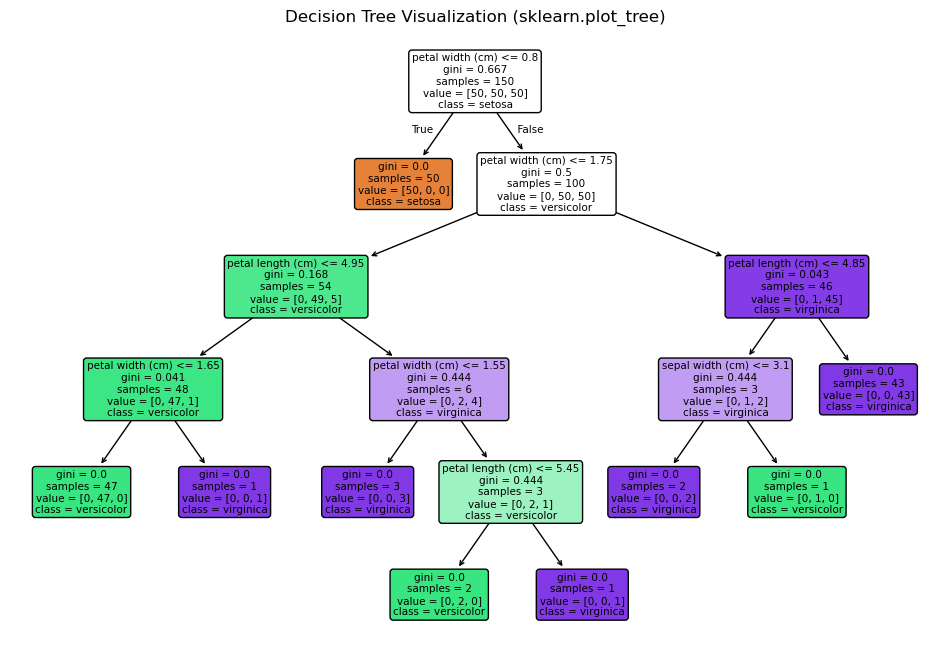

In [8]:
#14.3 Visualizing Decision Trees (modern approach)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf = DecisionTreeClassifier(random_state=0)
model = clf.fit(X, y)
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization (sklearn.plot_tree)")
plt.show()

In [9]:
#14.4 Training a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
iris=datasets.load_iris()
X,y=iris.data,iris.target
clf=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
clf.fit(X,y)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [10]:
observations=[[5,4,3,2],[1,2,3,4]]
clf.predict(observations)


array([1, 2])

In [11]:
randomforest_entropy=RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=0,n_jobs=-1)
randomforest_entropy.fit(X,y)

RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)

In [12]:
#14.5 Training a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X, y = housing.data, housing.target
regressor = RandomForestRegressor(n_estimators=100,random_state=0,n_jobs
=-1)
regressor.fit(X, y)


RandomForestRegressor(n_jobs=-1, random_state=0)

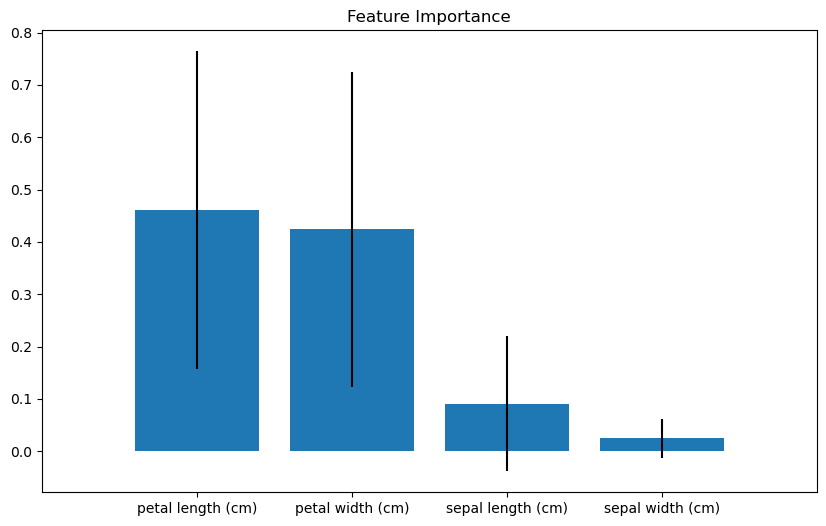

In [13]:
#14.6 Identifying important features in Random Forests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
clf.fit(X, y)
importances = clf.feature_importances_
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
names = [iris.feature_names[i] for i in indices]
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices
], align="center")
plt.xticks(range(X.shape[1]), names)
plt.xlim([-1, X.shape[1]])
plt.show()


In [14]:
clf.feature_importances_

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

In [15]:
#14.7 Tuning Hyperparameters in Random Forests
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
iris = datasets.load_iris()
X, y = iris.data, iris.target
randomforest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
selector=SelectFromModel(randomforest, threshold='median')
features_important=selector.fit_transform(X,y)
model_important=randomforest.fit(features_important,y)

In [16]:
#14.8 Hnadling Imbalanced Classes
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target
X = X[40:,:]
y = y[40:]
y=np.where(y==2,1,0)  #making it binary classification problem
randomforest=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1,class_weight='balanced')
model=randomforest.fit(X,y)

In [17]:
110/(2*10)

5.5

In [18]:
#14.9 Controlling Tree Size
# DecisionTreeClassifier is already imported from sklearn.tree
from sklearn import datasets
iris = datasets.load_iris()
features=iris.data
labels=iris.target
clf=DecisionTreeClassifier(max_depth=2,min_samples_split=10,min_samples_leaf=5,random_state=0)
model=clf.fit(features,labels)

In [19]:
#14.10 Improving Peformance with Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
adaboost=AdaBoostClassifier(n_estimators=100,learning_rate=0.1,random_state=0)
model=adaboost.fit(X,y)

In [20]:
#14.11 Evaluating Random Forests with Out-of-Bag Samples
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=0)
model=rf.fit(X,y)
print(rf.oob_score_)

0.9533333333333334


In [ ]:
#In random Forests, each decision tree is trained using a bootstrap subset of observations.This means that for every tree there is a subset of observations not being used to train that tree. These are called out-of-bag observations